In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [22]:
dataset=pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
X = dataset.iloc[:,1:2].values
y=  dataset.iloc[:,2].values.reshape(-1,1)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y=  StandardScaler()
X  = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting SVR to dataset

In [25]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X,y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

## Visualize the result

Text(0,0.5,'Salary')

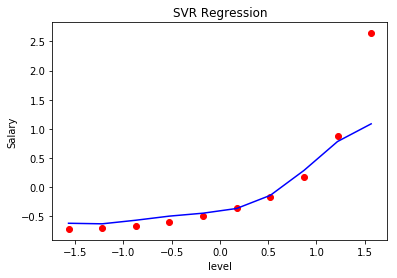

In [37]:
plt.scatter(X,y,color = 'red')
plt.plot(X,regressor.predict(X),color=  'blue')
plt.title("SVR Regression")
plt.xlabel("level")
plt.ylabel('Salary')